In [2]:
import matplotlib.pyplot as plt
import pandas as pd

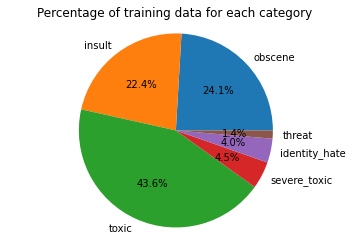

In [3]:
dataset = pd.read_table("train.csv", header=0, sep=",", encoding="unicode_escape")

labels = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

xs = []
for label in labels:
    xs.append(dataset[label].sum())
fig, ax = plt.subplots()
ax.pie(xs, labels=labels, autopct='%1.1f%%')
ax.axis("equal")
plt.title("Percentage of training data for each category")
plt.show()

In [4]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

def clean_data(data):
    # convert words to lowercase
    data = data.lower()
    # replace contractions with full form
    data = data.split()
    new_data = list()
    for word in data:
        if word in contractions:
            new_data.append(contractions[word])
        else:
            new_data.append(word)
    data = " ".join(new_data)
    # remove punctuation
    table = str.maketrans('', '', string.punctuation) 
    data = data.translate(table)
    # filter out stop words
    data = data.split()
    stop_words = set(stopwords.words('english'))
    data = [word for word in data if word not in stop_words]
    # lemmatization
    data = [WordNetLemmatizer().lemmatize(word) for word in data]
    # # correcting typos/spelling
    # spell = Speller(lang='en')
    # data = [spell(word) for word in data]
    data = " ".join(data)
    return data 

df = pd.read_csv("train.csv", index_col=0)
df['Cleaned_Text'] = list(map(clean_data, df.comment_text))
pd.set_option('max_colwidth', 500)
df[['comment_text', 'Cleaned_Text']].sample(5)

,comment_text,Cleaned_Text
id,,
75c5f5e8df374f98,Keep this under your hat but i heard he was gay dude.,keep this under your hat but i heard he was gay dude
59a40c2faa58d672,"""\n\n Thanxmas listed for deletion \n An article that you have been involved in editing, Thanxmas, has been listed at Wikipedia:Articles for deletion/Thanxmas. Please look there to see why this is, if you are interested in it not being deleted. Thank you. """,thanxmas listed for deletion an article that you have been involved in editing thanxmas has been listed at wikipedia articles for deletion thanxmas please look there to see why this is if you are interested in it not being deleted thank you
b6f8d197e394ae49,I'm going to remove the RFC thing against Tiptoe. thumbsup:,i am going to remove the rfc thing against tiptoe thumbsup
f8c2f29db819dda9,"s\n\nNow mr dictator you response is rubbish. your suppose to review the evidence not act as prosecuting council for one stupid man , Its civil behaviour is what matters and his is an absolute disgrace. he's the one who started the incivilty calling my redits vandalism when they were prefectly appropriate. you should look at all the posts on rod laver, tennis staistic and jimmy connors . look at the responses of carlo colussi and german friuend and see what they think of tennis arrogant. I ...",s now mr dictator you response is rubbish your suppose to review the evidence not act as prosecuting council for one stupid man its civil behaviour is what matters and his is an absolute disgrace he the one who started the incivilty calling my redits vandalism when they were prefectly appropriate you should look at all the posts on rod laver tennis staistic and jimmy connors look at the responses of carlo colussi and german friuend and see what they think of tennis arrogant i will call him a...
1df5c40f139e19c2,"""\nWow for the barnstar. Well you were the one who showed me your ... ahem.. shaved picture on facepic. He he. My eye power is -9.5/-9.75. I'm also near sighted but wear lenses most of hte time. WEll baby!!! Single is in Vogue. I can proudly say that I'm single, ready to mingle, with lots of tingle. (talk2me) """,wow for the barnstar well you were the one who showed me your ahem shaved picture on facepic he he my eye power is 9 5 9 75 i am also near sighted but wear lenses most of hte time well baby single is in vogue i can proudly say that i am single ready to mingle with lots of tingle talk2me


... Processing obscene
Testing Accuracy is 95.64463569518716
... Processing insult
Testing Accuracy is 95.54436831550802
... Processing toxic
Testing Accuracy is 91.79060828877004
... Processing severe_toxic
Testing Accuracy is 98.97017045454545
... Processing identity_hate
Testing Accuracy is 99.18532754010695
... Processing threat
Testing Accuracy is 99.6908422459893


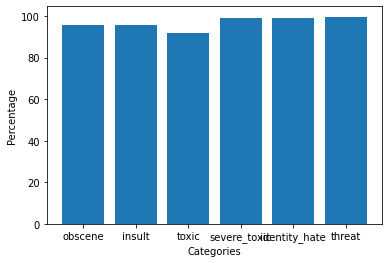

In [12]:
import pylab as plt
import classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

score, costs = [], []
for label in classifier.labels:
    print('... Processing {}'.format(label))
    model = classifier.logreg_one.LogisticRegression()
    model.fit(classifier.training_input, classifier.training_labels[label])
    # compute the training accuracy
    y_pred_X = model.predict(classifier.test_input)
    accuracy = accuracy_score(classifier.test_labels[label],y_pred_X)*100
    score.append(accuracy)
    print('Testing Accuracy is {}'.format(accuracy))
    
l = [1,2,3,4,5,6]
plt.bar(l, score)
plt.xticks(l, classifier.labels)
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.show()